# Digit Recognizer

In this Challage I try to create a feed-forward Neural Network that recognizes Digits in images.

- created by: Mickey krekels 
- Class: AI45

Load in al the Imports 

In [1]:
import sys
sys.path.insert(1, 'D:/AI_software/Jupyter/Saved Files/Neural Network/Sigmoid_NN') #imports neural network
import collections
import numpy as np
import Perceptron as pr 
import MultiLayerPerceptron as mlp
from colorama import Fore, Back, Style 
import matplotlib.pyplot as plt
import pandas as pd

## Neural Network code 

The code for the Perceptron. To make things a bit easier I use sigmoid as an activation function.

In [2]:
# %load D:/AI_software/Jupyter/Saved Files/Neural Network/Sigmoid_NN/Perceptron.py
import numpy as np
class Perceptron:
    
    def __init__(self,inputs,bias=1.0):
        self.weights = (np.random.rand(inputs+1)*2)-1
        self.bias = bias 
        
    def run(self,x):
        sum = np.dot(np.append(x,self.bias),self.weights)
        return self.sigmoid(sum)
    
    def set_weights(self,w_init):
        self.weights = np.array(w_init)
        
    def sigmoid(self,x):
        result = 1/(1 + np.exp(-x))
        return result
    


The code for the MultiLayerPerceptron.

In [3]:
# %load D:/AI_software/Jupyter/Saved Files/Neural Network/Sigmoid_NN/MultiLayerPerceptron.py
import numpy as np
import Perceptron as pr 

class MultiLayerPerceptron:
    
    def __init__(self,layers,bias =1.0,eta = 0.5):
        self.layers = np.array(layers,dtype=object)
        self.bias = bias
        self.eta = eta
        self.network = [] # The list of lists of neurons
        self.values = []  # The list of lists of output values
        self.d = []       # The list of lists of error terms (lowercase deltas)

        for i in range(len(self.layers)):
            self.values.append([])
            self.d.append([])
            self.network.append([])
            self.values[i] = [0.0 for j in range(self.layers[i])]
            self.d[i] = [0.0 for j in range(self.layers[i])]
            if i > 0:      #network[0] is the input layer, so it has no neurons
                for j in range(self.layers[i]): 
                    self.network[i].append(pr.Perceptron(inputs = self.layers[i-1], bias = self.bias))
        
        self.network = np.array([np.array(x) for x in self.network],dtype=object)
        self.values = np.array([np.array(x) for x in self.values],dtype=object)
        self.d = np.array([np.array(x) for x in self.d],dtype=object)
        
    def set_weights(self,w_init):
        for x in range(len(w_init)):
            for y in range(len(w_init[x])):
                self.network[x+1][y].set_weights(w_init[x][y])
        
    def print_weights(self):  
        print()
        for x in range(1,len(self.network)):
            for y in range(self.layers[x]):
                print("Layer: ",x+1," Neuron: ",y,self.network[x][y].weights)
        print()
        
        
    def run(self,x):
        x = np.array(x, dtype=object)
        self.values[0] = x
        
        for x in range(1,len(self.network)):
            for y in range(self.layers[x]):
                self.values[x][y] = self.network[x][y].run(self.values[x-1])
        return self.values[-1]
    
    def Backpropagation(self, x, y):
        x = np.array(x,dtype=object)
        y = np.array(y,dtype=object)

        #Feed a sample to the network 
        output = self.run(x)
        
        #Calculate the MSE
        error = (y - output)
        MSE = sum(error ** 2) /self.layers[-1] # ** is squared

        # STEP 3: Calculate the output error terms
        self.d[-1] = output * (1- output) * (error)

        #Calculate the error term of each unit on each layer
        for i in reversed(range(1,len(self.network)-1)):
            for h in range(len(self.network[i])):
                fwd_error = 0.0
                for k in range(self.layers[i+1]): 
                    fwd_error += self.network[i+1][k].weights[h] * self.d[i+1][k]               
                self.d[i][h] = self.values[i][h] * (1-self.values[i][h]) * fwd_error

        #Calculate the deltas and update the weights
        for i in range(1,len(self.network)):
            for j in range(self.layers[i]):
                for k in range(self.layers[i-1]+1):
                    if k == self.layers[i-1]: #if K == last weight
                        delta = self.eta * self.d[i][j] * self.bias
                    else:
                        delta = self.eta * self.d[i][j] * self.values[i-1][k]
                    self.network[i][j].weights[k] += delta
        return MSE


Load the data ([Digit Recognizer Dataset](https://www.kaggle.com/c/digit-recognizer/data?select=test.csv))

In [4]:
df = pd.read_csv("data/train.csv")

Taking the first 70 images of datasets

In [5]:
train_data = df[:160]
test_data  = df[160:200]

By looking at the data set you can see that the column "label" the target vector is. and the other columns pixel values.

In [6]:
test_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
160,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To get a better idea of what images will look like to the AI will process we will visualise them with a plot.

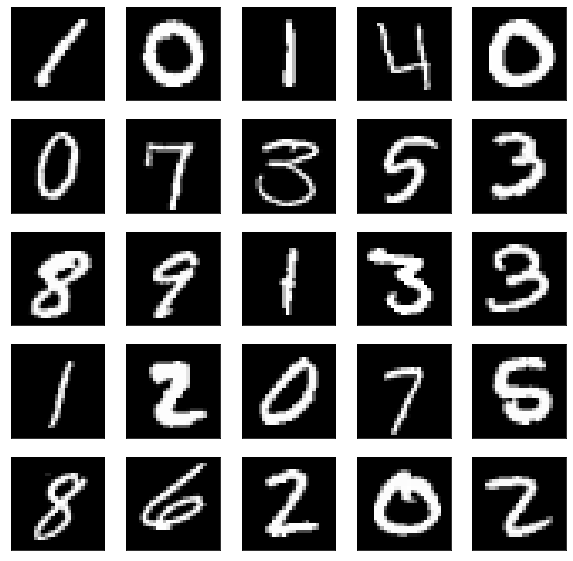

In [7]:
data = train_data.loc[:, train_data.columns != 'label'].values

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    single_image = data[i]
    single_image = single_image.reshape(28,28)
    plt.imshow(single_image, cmap='gray')
    plt.xticks([])
    plt.yticks([])

## Setting up the data

We create the Target vector form column "label" and store it in value y

In [8]:
yTrain = train_data.loc[:, 'label'].values
yTest  = test_data.loc[:, 'label'].values

We create a features matrix for the test and train set along with that we scale the values between 0 and 1

(If XTrain and yTrain is not scaled it can create [large error gradient](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/#:~:text=A%20target%20variable%20with%20a,in%20using%20neural%20network%20models.)) 

In [9]:
trainData = train_data.loc[:, train_data.columns != 'label'].values;
testData  = test_data.loc[:, train_data.columns != 'label'].values;

XTrain = (trainData - trainData.mean()) / (trainData.max() - trainData.min()) # scale the data between 0 and 1
XTest  = (testData - testData.mean()) / (testData.max() - testData.min()) # scale the data between 0 and 1

Currently, the target vector is a single Integer, but the desired output I want from the neural network is 10 values.
We need to convert the target vector to an array of 10 values, where each value represents a number from 0 to 9.

This makes it very easy to see how sure the network was of its predicted value.

In [10]:
def TargetToBinairArray(y):
    result  = []
    for j in range(len(y)):
        i = y[j]
        if(i == 0):
             result.append([1,0,0,0,0,0,0,0,0,0])
        if(i == 1):
             result.append([0,1,0,0,0,0,0,0,0,0])
        if(i == 2):
             result.append([0,0,1,0,0,0,0,0,0,0])
        if(i == 3):
             result.append([0,0,0,1,0,0,0,0,0,0])
        if(i == 4):
             result.append([0,0,0,0,1,0,0,0,0,0])
        if(i == 5):
             result.append([0,0,0,0,0,1,0,0,0,0])
        if(i == 6):
             result.append([0,0,0,0,0,0,1,0,0,0])
        if(i == 7):
             result.append([0,0,0,0,0,0,0,1,0,0])
        if(i == 8):
             result.append([0,0,1,0,0,0,0,0,1,0])
        if(i == 9):
             result.append([0,0,0,0,0,0,0,0,0,1])                      
    return result

## Training the model

First, we train the neural network with the training dataset. for every epoch, we calculate the MSE (mean squared error) and plot it to see the learning curve of the network. 

To create model for the network I start with using a basic [Feedforward technique](https://en.wikipedia.org/wiki/Feedforward_neural_network). I tried adding more and less hidden layers and played with the amount of perceptrons until I was happy with the MSE score.

The structure of current model is:
- input of 784 (28 * 28 pixels) 
- 3 hidden layers
 1. 100 perceptrons
 2. 100 perceptrons
 3. 100  perceptrons
- output of 10 (0 to 9 predicted numbers)

Train for 50 epochs output:

![title](Images/Model_totalPixels_100_100_100_10.png)

The models is succesfull! but the problem is that the line goes flat afther 30 epochs. This can cause our model to be [overfitting](https://en.wikipedia.org/wiki/Overfitting), to it more flexible for new data we change the epochs to 25. 


Training Neural Network to recognize Digits



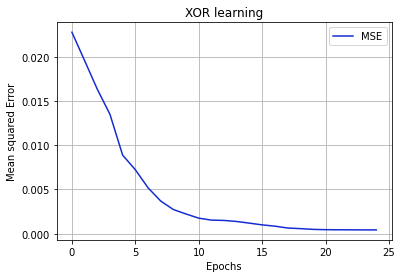

Wall time: 6min 23s


In [11]:
%%time
totalPixels = 28 * 28
MultiP = mlp.MultiLayerPerceptron(layers=[totalPixels,100,100,100,10])
print("\nTraining Neural Network to recognize Digits")
data = []
epochs = 25
targets = TargetToBinairArray(yTrain)
TestingData = XTrain

for i in range(epochs):
    MSE = 0.0
    for j in range(len(TestingData)):
        
        target = targets[j]
        single_image = TestingData[j]
        single_image = single_image.reshape(28,28)
        single_image = single_image.ravel()
        MSE += MultiP.Backpropagation(single_image,target)
    MSE = MSE/totalPixels
    data.append(MSE) #adds MSE data to array

print()
plt.plot(data,label='MSE',color="#142BD3FF")
plt.xlabel('Epochs')
plt.ylabel('Mean squared Error')
plt.title('XOR learning')
plt.legend()
plt.grid()
plt.show()


## Testing the model

The model performs well with the test data. It correctly predicted every number. 

In [12]:
%%time

testingData = XTest
target = yTest

for i in range(len(XTest)):
    single_image = testingData[i]
    single_image = single_image.reshape(28,28)
    single_image = single_image.ravel()
    result = MultiP.run(single_image)
    print()
    print(target[i],"at index",i , ": ")
    
    for j in range(len(result)):
        best = np.max(result)
        if(result[j] == best):
            if(j == target[i]):
                print('\x1b[6;30;42m',j," = {0:.10f}".format(result[j]),'\x1b[0m')
            else:
                print(Back.RED,j, " = {0:.10f}".format(result[j]),Style.RESET_ALL) 
        else:
            if(j == target[i]):
                 print('\x1b[6;30;42m',j," = {0:.10f}".format(result[j]),'\x1b[0m')
            else:
                print(" ",j," = {0:.10f}".format(result[j]))

print()


6 at index 0 : 
  0  = 0.0006271875
  1  = 0.0008768691
  2  = 0.0391853093
  3  = 0.0014477500
  4  = 0.0001559278
  5  = 0.3540170062
 6  = 0.9048388750 
  7  = 0.0001971213
  8  = 0.0221840124
  9  = 0.0056256841

9 at index 1 : 
  0  = 0.0001546648
  1  = 0.0003656252
  2  = 0.0011096699
  3  = 0.0165012833
  4  = 0.0013985833
  5  = 0.0048678298
  6  = 0.0076833587
  7  = 0.1511202730
  8  = 0.0163809914
 9  = 0.4962437761 

5 at index 2 : 
  0  = 0.0005672464
  1  = 0.0011244591
  2  = 0.0296670414
  3  = 0.0000809266
  4  = 0.0889258566
 5  = 0.2325320143 
  6  = 0.0119153330
  7  = 0.0070370257
  8  = 0.0177658783
  9  = 0.0590020773

4 at index 3 : 
  0  = 0.0017924348
  1  = 0.0003373213
  2  = 0.0014200530
  3  = 0.0001927805
 4  = 0.7741662315 
  5  = 0.0001780068
  6  = 0.0127526852
  7  = 0.0151027329
  8  = 0.0060783383
  9  = 0.1766347154

6 at index 4 : 
  0  = 0.0000370613
 1  = 0.5160471855 
  2  = 0.0661461804
  3  = 0.0004627353
  4  = 0.0024195775
  5  = 0.013549

Some of the values where a bit low or to close to the other numbers. I think the numbers where hard to read or the dataset was short on those particular digits.

The low predict values: 
 -  0.0980163465 at index 3 
 -  0.1204448190 at index 4 
 -  0.1560220735 at index 6
 
Let's visualise these picture with a plot and see how they look like.

low predict values


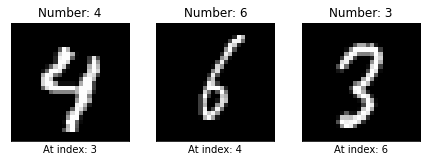

In [13]:
indexs = [3,4,6]

plt.figure(figsize=(10,10))
count = 0

print("low predict values")
for index in indexs:
    count = count +1
    plt.subplot(4,4,count +1)
    single_image = XTest[index]
    single_image = single_image.reshape(28,28)
    plt.imshow(single_image, cmap='gray')
    plt.title("Number: " + str(yTest[index]))
    plt.xlabel("At index: "+ str(index))
    plt.xticks([])
    plt.yticks([])



other predict values


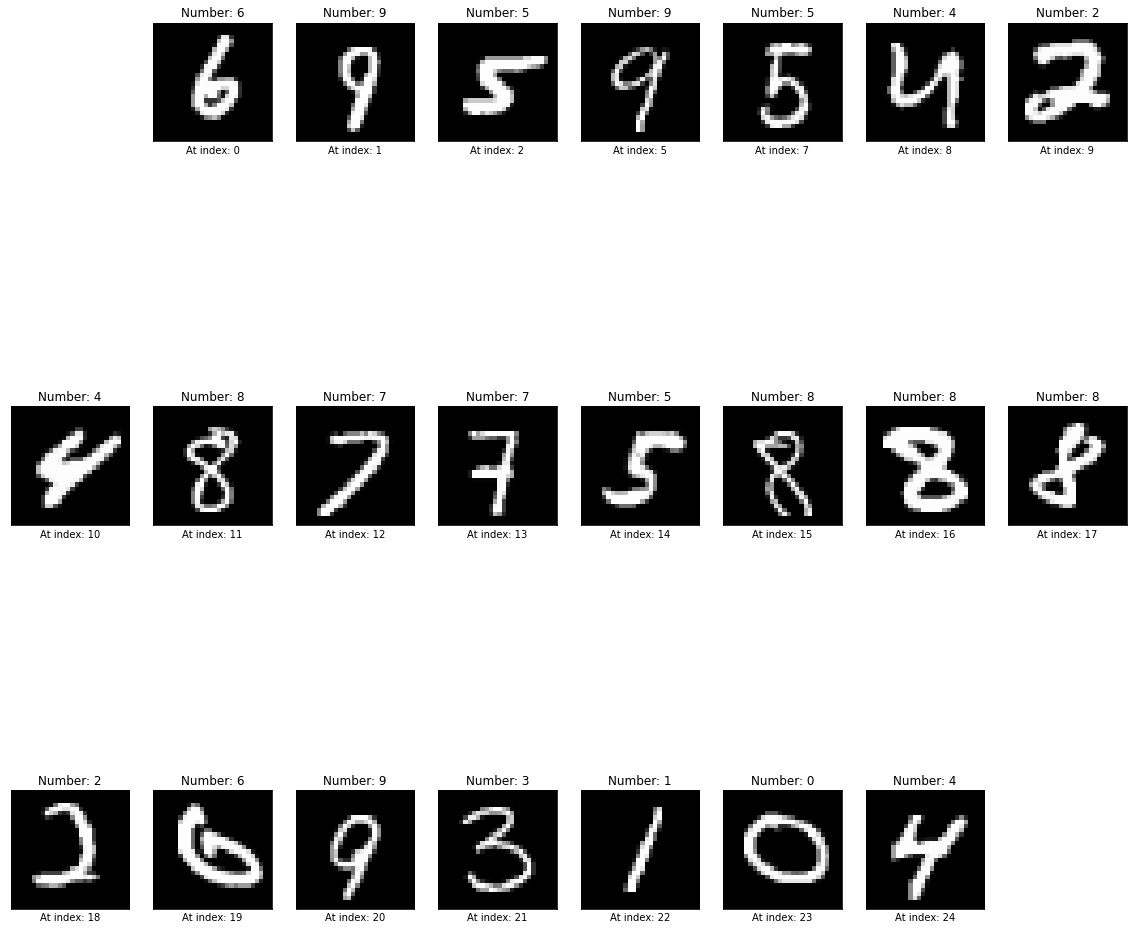

In [15]:
print("other predict values")
count = 0
plt.figure(figsize=(20,20))
for index in range(len(XTest[:25])):
    if(index in indexs): continue    
    count = count +1
    plt.subplot(3,8,count +1)
    single_image = XTest[index]
    single_image = single_image.reshape(28,28)
    plt.imshow(single_image, cmap='gray')
    plt.title("Number: " + str(yTest[index]))
    plt.xlabel("At index: "+ str(index))
    plt.xticks([])
    plt.yticks([])  

The low prediction images are not looking unclear. If I where the network I would guess that at index 5 number 2 would be the most difficult to predict. So perhaps the reason why the network has a hard time predicting these 3 images. is because of a shortage of images of 9, 0 and 2 in the training set.

Let us test that out by finding the count of the equal numbers in the Training set.

In [16]:
countedEqualValues = collections.Counter(yTrain)

print(countedEqualValues)
print()
print("The count of equal numbers in target vector set: ")
print()
sortedCount = []
for i in range(0,10):
    for letter, count in countedEqualValues.most_common():   
            if(letter == i): 
                sortedCount.append(count)
      
for j in range(len(sortedCount)):
    if(j in [9,0,2]):
        print(Back.GREEN,'%s: %7d' % (j, sortedCount[j]),Style.RESET_ALL) 
    else:
        print ('%s: %7d' % (j, sortedCount[j]))

            

Counter({1: 21, 0: 19, 9: 18, 4: 17, 7: 17, 3: 16, 2: 14, 6: 14, 5: 13, 8: 11})

The count of equal numbers in target vector set: 

 0:      19 
1:      21
 2:      14 
3:      16
4:      17
5:      13
6:      14
7:      17
8:      11
 9:      18 


## Saving the AI

In [19]:
import pickle
with open('Saves/NeuralNetwork_Digit Recognizer_1.pkl', 'wb') as f:
    pickle.dump(MultiP, f)



with open('Saves/NeuralNetwork_Digit Recognizer_1.pkl', 'rb') as f:
    test = pickle.load(f)
    

In [20]:
testingData = XTest
target = yTest

for i in range(len(XTest)):
    single_image = testingData[i]
    single_image = single_image.reshape(28,28)
    single_image = single_image.ravel()
    result = test.run(single_image)
    print()
    print(target[i],"at index",i , ": ")
    
    for j in range(len(result)):
        best = np.max(result)
        if(result[j] == best):
            if(j == target[i]):
                print('\x1b[6;30;42m',j," = {0:.10f}".format(result[j]),'\x1b[0m')
            else:
                print(Back.RED,j, " = {0:.10f}".format(result[j]),Style.RESET_ALL) 
        else:
            if(j == target[i]):
                 print('\x1b[6;30;42m',j," = {0:.10f}".format(result[j]),'\x1b[0m')
            else:
                print(" ",j," = {0:.10f}".format(result[j]))

print()


6 at index 0 : 
  0  = 0.0006271875
  1  = 0.0008768691
  2  = 0.0391853093
  3  = 0.0014477500
  4  = 0.0001559278
  5  = 0.3540170062
 6  = 0.9048388750 
  7  = 0.0001971213
  8  = 0.0221840124
  9  = 0.0056256841

9 at index 1 : 
  0  = 0.0001546648
  1  = 0.0003656252
  2  = 0.0011096699
  3  = 0.0165012833
  4  = 0.0013985833
  5  = 0.0048678298
  6  = 0.0076833587
  7  = 0.1511202730
  8  = 0.0163809914
 9  = 0.4962437761 

5 at index 2 : 
  0  = 0.0005672464
  1  = 0.0011244591
  2  = 0.0296670414
  3  = 0.0000809266
  4  = 0.0889258566
 5  = 0.2325320143 
  6  = 0.0119153330
  7  = 0.0070370257
  8  = 0.0177658783
  9  = 0.0590020773

4 at index 3 : 
  0  = 0.0017924348
  1  = 0.0003373213
  2  = 0.0014200530
  3  = 0.0001927805
 4  = 0.7741662315 
  5  = 0.0001780068
  6  = 0.0127526852
  7  = 0.0151027329
  8  = 0.0060783383
  9  = 0.1766347154

6 at index 4 : 
  0  = 0.0000370613
 1  = 0.5160471855 
  2  = 0.0661461804
  3  = 0.0004627353
  4  = 0.0024195775
  5  = 0.013549

The numbers 0,2,9 in the training have a common amount of training images, so there is no training shortage. Perhaps the network find is hard to predict the shapes of those numbers. I think more training data is needed to improve this AI.

## Conclusion

In this jupyter-notebook I created a model that predict the digits in an image. 
The model consisted of:

- input of 784 (28 * 28 pixels) 
- 3 hidden layers
 1. 100 perceptrons
 2. 100 perceptrons
 3. 100  perceptrons
- output of 10 (0 to 9 predicted numbers)

I trained the model using 50 images from the ([Digit Recognizer Dataset](https://www.kaggle.com/c/digit-recognizer/data?select=test.csv)) and used 20 images to test the model. This proved to be enough, after 25 epochs the network was able to successfully predict the 20 test images. But some of the percentages could be higher, the network is not predicting with confidence. I tried to find a cause for this issue, but I think the reason is that network needs to be more trained. 

In short, the network was able to predict the digits in multiple images, but more training is needed if this AI would be used in a professional setting.  



